<a href="https://colab.research.google.com/github/benmsanderson/tcre-star/blob/main/Grassi_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import xarray as xr

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#load managed land mask
out_grid=xr.open_dataset('/content/drive/MyDrive/tcre_star/out_grid.nc')
out_fgrid=xr.open_dataset('/content/drive/MyDrive/tcre_star/out_fgrid.nc')


In [4]:
mdls=["CanESM5"]
scens={'ssp119'}

In [5]:
def make_weights(out_grid,out_fgrid,ds):
  upsampled = out_grid.interp_like(ds)
  upsampled['intfrac']=upsampled['exists'].fillna(0)
  upsampled_f = out_fgrid.interp_like(ds)
  upsampled['allfrac']=upsampled_f['exists'].fillna(0)
  upsampled['distfrac']=upsampled['allfrac']-upsampled['intfrac']
  return upsampled

In [6]:
ds_scn={}
for i,mdl in enumerate(mdls):
  ds_scn[mdl]={}
  for j,scn in enumerate(scens):
        ds_scn[mdl][scn]=xr.open_dataset('/content/drive/MyDrive/tcre_star/'+mdl+'_'+scn+'.nc')
        tmp=make_weights(out_grid,out_fgrid,ds_scn[mdl][scn])
        ds_scn[mdl][scn]=xr.merge([ds_scn[mdl][scn],tmp])
        ds_scn[mdl][scn]['cLandn_d'] = ds_scn[mdl][scn]['nbp']*3600*24*365*tmp['distfrac']
        ds_scn[mdl][scn]['cLandn'] = ds_scn[mdl][scn]['nbp']*3600*24*365


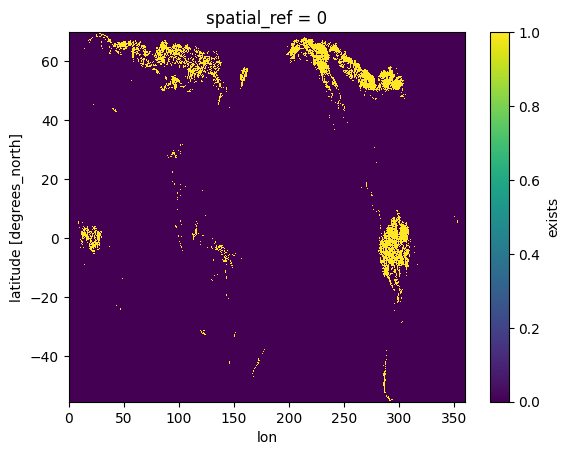

In [7]:
out_grid['exists'].plot()

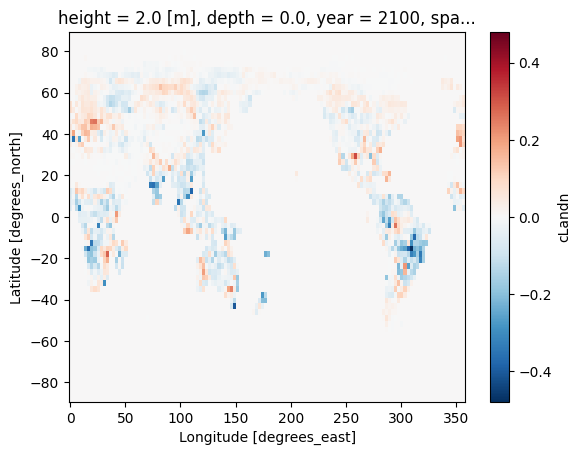

In [9]:
ds_scn['CanESM5']['ssp119']['cLandn'][-1,:].plot()